## Importing Libraries and Loading Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Md Shah Alak\Downloads\netflix_titles.csv")

## Overview of the Dataset

In [2]:
# Quick look at sample rows to get an initial sense of the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Shows number of rows and columns
df.shape        

(8807, 12)

In [4]:
# Count the number of missing values in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
# Calculate the percentage of missing values in each column
df.isnull().mean()*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [6]:
# Show summary stats for numeric data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
# Inspect the dataset structure to identify missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Data Cleaning

In [8]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

In [9]:
# Handle missing values
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Remove missing date_added rows for accurate analysis
df = df.dropna(subset=['date_added'])
df['date_added'] = pd.to_datetime(df['date_added'])
df['duration'] = df['duration'].astype(str)
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
# Fix missing text columns
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")

In [10]:
# Split genre into lists
df['listed_in'] = df['listed_in'].str.split(', ')

In [11]:
# Replace values 0 min
df['duration'] = df['duration'].replace(['nan', 'None', '', ' '], '0 min')
# Extract duration numbers
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract(r'(min|Season|Seasons)')

## Basic EDA in cleaned dataframe

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8709 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8709 non-null   object        
 1   type           8709 non-null   object        
 2   title          8709 non-null   object        
 3   director       8709 non-null   object        
 4   cast           8709 non-null   object        
 5   country        8709 non-null   object        
 6   date_added     8709 non-null   datetime64[ns]
 7   release_year   8709 non-null   int64         
 8   rating         8709 non-null   object        
 9   duration       8709 non-null   object        
 10  listed_in      8709 non-null   object        
 11  description    8709 non-null   object        
 12  duration_num   8709 non-null   float64       
 13  duration_type  8709 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 1020.6+ 

In [13]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
duration_num     0
duration_type    0
dtype: int64

## Visualizations

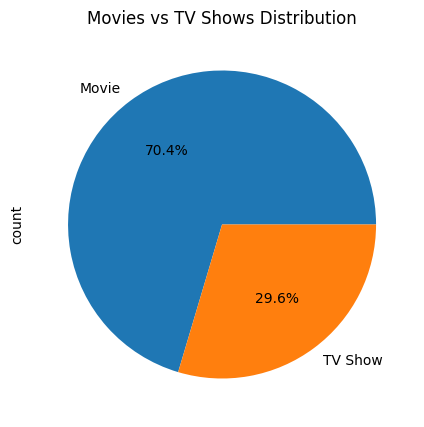

In [14]:
# Movies vs TV Shows Count
plt.figure(figsize=(5,5))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Movies vs TV Shows Distribution")
plt.show()

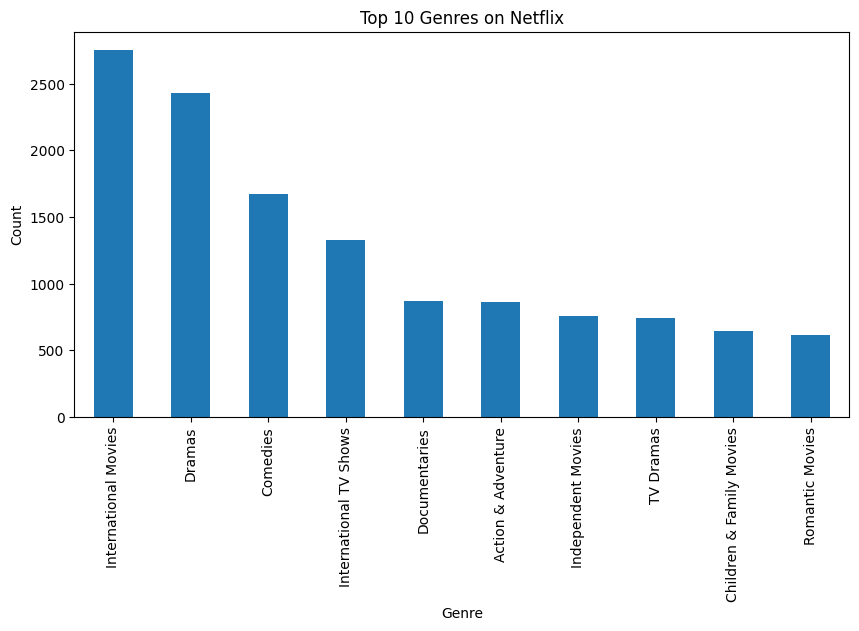

In [15]:
# Top 10 Genres
genres = df.explode('listed_in')
top_genres = genres['listed_in'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_genres.plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

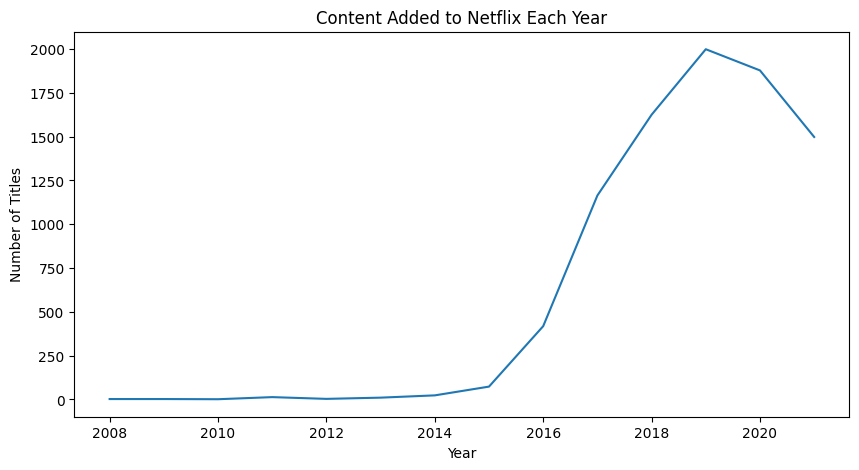

In [16]:
# Number of Titles Added Per Year
df['year_added'] = df['date_added'].dt.year

content_per_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(content_per_year.index, content_per_year.values)
plt.title("Content Added to Netflix Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

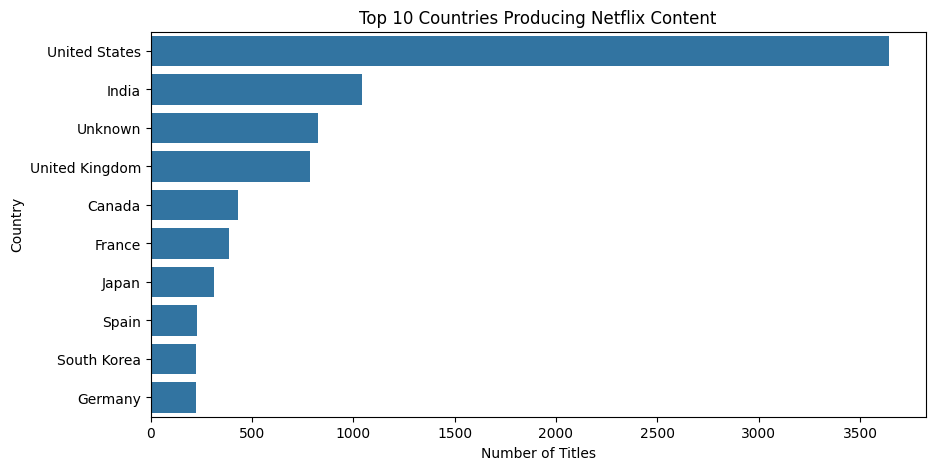

In [17]:
# Top 10 Countries Producing Netflix Content
country = df['country'].str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country.values, y=country.index)
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()